In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
data = pd.read_csv("Eezybuy Cleaned Data.csv")

In [3]:
# Preprocessing
# Convert categorical variables to numerical using LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List the categorical columns to encode
categorical_columns = ['Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency',
                       'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration',
                       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 
                       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness',
                       'Recommendation_Helpfulness', 'Service_Appreciation',
                       'Improvement_Areas', 'age_group']

# Encode the values of each categorical column 
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Print the encoded data
print(data)

      Age  Gender  Purchase_Frequency  Purchase_Categories  \
0      23       0                   0                    0   
1      23       0                   3                    8   
2      24       3                   0                   20   
3      24       0                   3                    4   
4      22       0                   1                    1   
...   ...     ...                 ...                  ...   
1202   60       3                   3                    8   
1203   26       1                   0                    0   
1204   25       1                   4                    0   
1205   45       3                   0                    0   
1206   12       0                   0                   12   

      Personalized_Recommendation_Frequency  Browsing_Frequency  \
0                                         2                   1   
1                                         2                   0   
2                                         0           

In [4]:
# Select Target Variable: Create a binary variable indicating whether a customer made a purchase within the last month
data['Purchase_Last_Month'] = (data['Purchase_Frequency'] == 'Multiple times a week') | (data['Purchase_Frequency'] == 'Once a week') | (data['Purchase_Frequency'] == 'Few times a week')

# Feature Selection: Choose relevant features
features = ['Age', 'Gender', 'Purchase_Categories', 'Browsing_Frequency', 'Product_Search_Method', 'Cart_Completion_Frequency', 'Review_Left', 'Shopping_Satisfaction']

X = data[features] 
y = data['Purchase_Last_Month']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Model Training
# Initialize the Random Forest classifier
clf = RandomForestClassifier()

In [7]:
# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# Model Evaluation
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [9]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       242

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

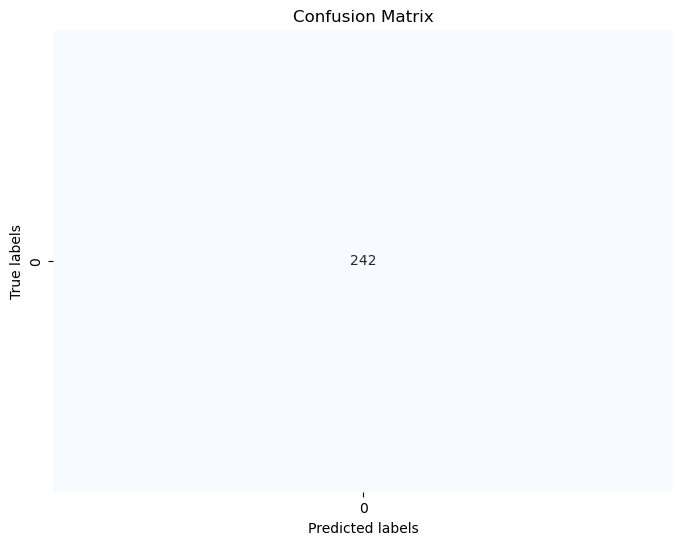

In [26]:
# True labels
true_labels = ['False'] * 242

# Predicted labels
predicted_labels = ['False'] * 242

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Save the trained model to a file named 'trained_model.pkl'
import joblib
joblib.dump(clf, 'trained_model')

print("Model saved successfully.")

Model saved successfully.
